# Import the necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
from subprocess import check_output
import io
import matplotlib

%matplotlib inline

matplotlib.style.use('ggplot')
sns.set_style("darkgrid")

Using TensorFlow backend.


In [3]:
!wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip'

--2019-01-27 06:26:54--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  47.3MB/s    in 30s     

2019-01-27 06:27:24 (48.8 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]



In [0]:
import io
f = io.open("task1.train.txt", mode="r", encoding="utf-8")

In [0]:
df = pd.DataFrame(columns=["text","article_id","propaganda"])

In [0]:
lines = f.read().split("\n")

In [0]:
x = []
for i in lines:
    i = i.split("\t")
    x.append(i)

In [0]:
df = pd.DataFrame(x, columns=["text","article_id","propaganda"])

In [9]:
df.head()

,text,article_id,propaganda
0,"Et tu, Rhody? A recent editorial in the Provi...",727600136,non-propaganda
1,A recent post in The Farmington Mirror — our t...,731714618,non-propaganda
2,"President Donald Trump, as he often does while...",731714635,non-propaganda
3,"February is Black History Month, and nothing l...",728627182,non-propaganda
4,"The snow was so heavy, whipped up by gusting w...",728627443,non-propaganda


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import nltk
import sklearn as sk
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))


# MY STOPWORDS
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", "no", "nor","not"])

In [12]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(df['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    #sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

100%|██████████| 35994/35994 [00:46<00:00, 774.15it/s]


In [0]:
df["text"] = preprocessed_text

### Load the data into Pandas dataframe

In [14]:
df.head()

,text,article_id,propaganda
0,et tu rhody recent editorial providence journa...,727600136,non-propaganda
1,recent post farmington mirror town version oni...,731714618,non-propaganda
2,president donald trump often responding natura...,731714635,non-propaganda
3,february black history month nothing looms lar...,728627182,non-propaganda
4,snow heavy whipped gusting winds travel nearly...,728627443,non-propaganda


Drop the columns that are not required for the neural network.

Understand the distribution better.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of prp and nonprop news')

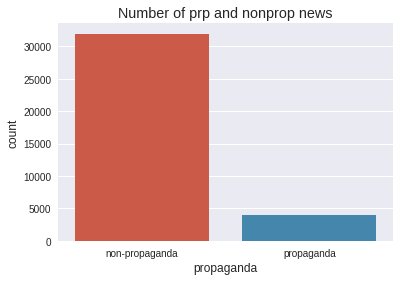

In [15]:
sns.countplot(df.propaganda)
plt.xlabel('propaganda')
plt.title('Number of prp and nonprop news')

In [0]:
df = df.dropna()

* Create input and output vectors.
* Process the labels.

In [0]:
df['length'] = [len(text) for text in df['text']]

In [0]:
df = df[df.length < 40000]

In [25]:
df['length'].describe()

count    35990.000000
mean      2454.467519
std       1992.363184
min         23.000000
25%       1197.000000
50%       1977.000000
75%       3189.000000
max      34137.000000
Name: length, dtype: float64

In [0]:
X = df.text
Y = df.propaganda
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split into training and test data.

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
#Embedding(vocab_size ,300,input_length=120)(inputs)

### Process the data
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the *max_len* and here an arbitrary length of 150 is chosen.

In [0]:
max_words = 100000 
max_len = 500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

## Facebook Fasttext embedding

In [0]:
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
import os


class EmbedLoader:
    """
    @author: Ahmad Barqawi
    """

    def __init__(self):
        pass

    def get_embedding(self, embedding_file, embed_size):
        embedding_index = {}
        with open(embedding_file, encoding='utf8') as f:
            for line in f:
                values = line.rstrip().rsplit(' ')
                # word = ' '.join(values[:-embed_size])
                # coefs = np.asarray(values[-embed_size:], dtype='float32')
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embedding_index[word] = coefs
        f.close()

        return embedding_index

    def get_embedding2(self, embedding_file):
        embeddings_index = dict(self._get_coefs(*o.rstrip().split(' ')) for o in open(embedding_file))
        return embeddings_index

    def _get_coefs(self,word, *arr):
        return word, np.asarray(arr, dtype='float32')

    def get_embedding_matrix(self, embedding_index, word_index, embed_size, max_features):

        print("size word index: " , len(word_index))
        vocab_size = min(len(word_index), max_features) + 1
        embedding_matrix = np.zeros((vocab_size, embed_size))

        print("embedding_matrix shape: ", embedding_matrix.shape)

        for word, index in word_index.items():
            if index >= vocab_size:
                continue
            embedding_vector = embedding_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[index] = embedding_vector

        return embedding_matrix, vocab_size



In [0]:
from zipfile import ZipFile
with ZipFile('crawl-300d-2M.vec.zip', 'r') as zip:
  zip.extract('crawl-300d-2M.vec')


In [31]:

embed_loader = EmbedLoader()
embedding_index = embed_loader.get_embedding2('crawl-300d-2M.vec')
embedding_matrix, vocab_size = embed_loader.get_embedding_matrix(embedding_index, tok.word_index,300, max_words)

size word index:  150018
embedding_matrix shape:  (100001, 300)


### RNN
Define the RNN structure.

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    embed_size = 300
    emb_layer = Embedding(vocab_size, embed_size, weights=[embedding_matrix], trainable=False, name='embedding_1')(inputs)
    layer = emb_layer
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
from sklearn.metrics import f1_score

Call the function and compile the model.

In [44]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 300)          30000300  
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                93440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Fit on the training data.

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath='model_check.hdf5', verbose=1, monitor='val_loss', save_best_only=True)

In [47]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[early_stopping, checkpointer ])

Train on 24472 samples, validate on 6119 samples
Epoch 1/10
24472/24472 [==============================] - 309s 13ms/step - loss: 0.2561 - acc: 0.9096 - val_loss: 0.1916 - val_acc: 0.9294

Epoch 00001: val_loss improved from inf to 0.19160, saving model to model_check.hdf5
Epoch 2/10
24472/24472 [==============================] - 307s 13ms/step - loss: 0.1763 - acc: 0.9333 - val_loss: 0.1842 - val_acc: 0.9240

Epoch 00002: val_loss improved from 0.19160 to 0.18420, saving model to model_check.hdf5
Epoch 3/10
24472/24472 [==============================] - 308s 13ms/step - loss: 0.1487 - acc: 0.9436 - val_loss: 0.1650 - val_acc: 0.9415

Epoch 00003: val_loss improved from 0.18420 to 0.16502, saving model to model_check.hdf5
Epoch 4/10
24472/24472 [==============================] - 307s 13ms/step - loss: 0.1311 - acc: 0.9515 - val_loss: 0.1647 - val_acc: 0.9448

Epoch 00004: val_loss improved from 0.16502 to 0.16465, saving model to model_check.hdf5
Epoch 5/10
24472/24472 [===============

In [0]:
# load best score
model.load_weights('model_check.hdf5')

The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Evaluate the model on the test set.

In [50]:
accr = model.evaluate(test_sequences_matrix,Y_test)

5399/5399 [==============================] - 34s 6ms/step


In [51]:
accr

[0.1616873948245407, 0.9398036673899646]

In [0]:
y_pred = model.predict(test_sequences_matrix)

In [0]:
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [54]:
from sklearn.metrics import f1_score, fbeta_score
f1_score(Y_test, y_pred, average='macro')

0.8425999471935577

In [0]:
import nltk
import sklearn as sk
import pandas as pd
from bs4 import BeautifulSoup

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
nltk.download('stopwords')

In [0]:
filename = get_file('task1.train.txt')
df2 = pd.DataFrame(columns=["text","article_id","propaganda"])
lines = load_text_lines(filename)
lines = lines.split("\n")
x = []
for i in lines:
    i = i.split("\t")
    x.append(i)
df2 = pd.DataFrame(x, columns=["text","article_id","propaganda"])
df2.head()


In [0]:
df2.propaganda.value_counts()

In [0]:
df2['propaganda'] = df2['propaganda'].map({'propaganda': 1, 'non-propaganda': 0})

In [0]:
counts = df2.propaganda.value_counts()
counts

In [0]:
df2 = df2.dropna()

In [0]:
# This is a highly skewed dataset. There are only 4021 
print("Number of Propaganda items", counts[1])
print("Number of Not Propaganda items", counts[0])
print("Total number of records", len(df2))
percentage = (counts[1]*100)/len(df2)

print("percentage of propaganda items {0:.2f}%".format(percentage))

In [0]:
values = df2['propaganda'].value_counts().keys().tolist()
counts = df2['propaganda'].value_counts().tolist()

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
#NLTK STOPWORDS
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))


# MY STOPWORDS
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", "no", "nor","not"])

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(df2['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

In [0]:
df2["Cleaned_Text"] = preprocessed_text

In [0]:
final = df2
final.head()


In [0]:
restart_here = final.copy()

In [0]:
final = restart_here

# Splitting the dataset into Train, Test.
# Let's go for an 80 - 20 split.
labels = final["propaganda"]
finals = final.drop(columns=["propaganda"], axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finals, labels, test_size=0.15, random_state=42)
print(len(X_train))
print(len(X_test))

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [0]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_text)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_text)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Please write all the code with proper documentation
def bag_of_words(train_data, test_data, validation_data = None):
    count_vect = CountVectorizer() #in scikit-learn
    count_vect.fit(train_data)
    print("some feature names ", count_vect.get_feature_names()[:10])
    print('='*50)
    train_data_vectorized = count_vect.transform(train_data)
    test_data_vectorized = count_vect.transform(test_data)
    if validation_data:
        validation_data_vectorized = count_vect.tranform(validation_data)
    else:
        validation_data_vectorized = None
    print("the type of count vectorizer ",type(train_data_vectorized))
    print("the shape of out text BOW vectorizer ",train_data_vectorized.get_shape())
    print("the number of unique words ", train_data_vectorized.get_shape()[1])
    return train_data_vectorized, test_data_vectorized

In [0]:
train_data_vectorized , test_data_vectorized = bag_of_words(X_train["Cleaned_Text"], X_test["Cleaned_Text"])

In [0]:
train_data_vectorized

In [0]:
#from sklearn.model_selection import GridSearchCV

#knn = KNeighborsClassifier()
#n_list = range(1,10,2)
#parameters = {"n_neighbors":n_list}
#clf = GridSearchCV(knn, parameters, cv=3, verbose=2, n_jobs=2)
#clf.fit(train_data_vectorized,y_train)

In [0]:
clf.best_params_

In [0]:
clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(train_data_vectorized,y_train)
clf2.score(test_data_vectorized,y_test)

In [0]:
y_pred_2 = clf2.predict(test_data_vectorized)

In [0]:
y_true = y_test

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f1_score(y_true, y_pred_2))
print(recall_score(y_true, y_pred_2))
print(precision_score(y_true, y_pred_2))

In [0]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_data_vectorized,y_train)
mnb_pred = mnb.predict(test_data_vectorized)

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f1_score(y_true, mnb_pred))
print(recall_score(y_true, mnb_pred))
print(precision_score(y_true, mnb_pred))

In [0]:
mnb_pred , y_pred_2 , y_pred

In [0]:
y_pred = model.predict(sequences_matrix_test)

In [0]:
#y_avg = [(x + y + z) / 3 for x in y_pred for y in y_pred_2 for z in mnb_pred]
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
        
y_pred

In [0]:
print(len(y_pred))
print(len(mnb_pred))
print(len(y_pred_2))
#for i in range(len(y_pred))


#y_avg = np.zeros(len(y_pred))
#for i in range(len(y_pred)):
#    y_avg[i] = (y_pred[i] + y_pred_2[i] + mnb_pred[i]) / 3
#    #y_avg.append(avg)

In [0]:
#y_avg

In [0]:
for i in range(len(y_avg)):
    if y_avg[i] < 0.4:
        y_avg[i] = 0
    else:
        y_avg[i] = 1

In [0]:
y_avg

In [0]:
plt.plot(y_avg)